# Exam R
Mark Klik & Misja Mikkers

# Introduction

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:



In [1]:
NAME = "Florentia de Loijer, 2010437"
COLLABORATORS = ""

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

Unfortunately, you are not allowed to work with "COLLABORATORS" in this exam.

## exam September 7th, 2018

With this R part of the exam you can earn at max. 4 points.

In the first cell of the notebook, give us your name and student number in the way indicated above.

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you save it with the output of your code included.

Then put it on github, e.g. by dragging it onto github (see instructions below).

Finally, add a link to your README file with the name of this exam: "Exam R September 7, 2018".

# Packages

You will need the following packages for this exam.

In [1]:
library(tidyverse)
library(gvlma)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Assignment 1

## Data

Please read in "advertising.csv" and check the structure.

If needed change the variables TV and sales into a numeric variable.

Hint: don't forget you cannot change a factor in a numeric variable directly!



In [9]:
advertising <- read.csv2("../exam_sep_7/Advertising(2).csv")

In [68]:
head(advertising)
str(advertising)

Observation,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75,7.2


'data.frame':	200 obs. of  5 variables:
 $ Observation: int  1 2 3 4 5 6 7 8 9 10 ...
 $ TV         : Factor w/ 190 levels "0.7","100.4",..: 98 149 44 35 54 178 156 12 177 69 ...
 $ radio      : Factor w/ 167 levels "0","0.3","0.4",..: 113 118 141 127 13 148 93 40 42 45 ...
 $ newspaper  : Factor w/ 172 levels "0.3","0.9","1",..: 150 106 151 138 137 158 54 11 3 45 ...
 $ sales      : Factor w/ 121 levels "1.6","10.1","10.3",..: 79 4 116 62 27 105 17 28 95 6 ...


In [109]:
advertising1 <- read.csv2("../exam_sep_7/Advertising(2).csv") %>%
mutate(sales = as.numeric(as.character(sales))) %>%
mutate(TV = as.numeric(as.character(TV)))

In [110]:
str(advertising1)

'data.frame':	200 obs. of  5 variables:
 $ Observation: int  1 2 3 4 5 6 7 8 9 10 ...
 $ TV         : num  230.1 44.5 17.2 151.5 180.8 ...
 $ radio      : Factor w/ 167 levels "0","0.3","0.4",..: 113 118 141 127 13 148 93 40 42 45 ...
 $ newspaper  : Factor w/ 172 levels "0.3","0.9","1",..: 150 106 151 138 137 158 54 11 3 45 ...
 $ sales      : num  22.1 10.4 9.3 18.5 12.9 7.2 11.8 13.2 4.8 10.6 ...




## Regression 

You will now have to run a regression with sales as a function of TV. Show the summary statistics and check if the assumptions of linear regression are met (hint: use package gvlma).

In [112]:
regression <- lm(sales ~ TV, data=advertising1)
summary(regression)


Call:
lm(formula = sales ~ TV, data = advertising1)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


In [113]:
gvlma(regression)


Call:
lm(formula = sales ~ TV, data = advertising1)

Coefficients:
(Intercept)           TV  
    7.03259      0.04754  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = regression) 

                    Value p-value                Decision
Global Stat        5.3240 0.25564 Assumptions acceptable.
Skewness           0.2619 0.60885 Assumptions acceptable.
Kurtosis           0.4070 0.52352 Assumptions acceptable.
Link Function      3.6906 0.05472 Assumptions acceptable.
Heteroscedasticity 0.9646 0.32602 Assumptions acceptable.

According to the gvlma function, all assumptions are acceptable and the numbers are the same. 

## Plot

Now you have to make a scatter plot of the data:

* with TV on the x-axis
* sales on the y-axis
* the regression line in green, with confidence interval
* in a light theme


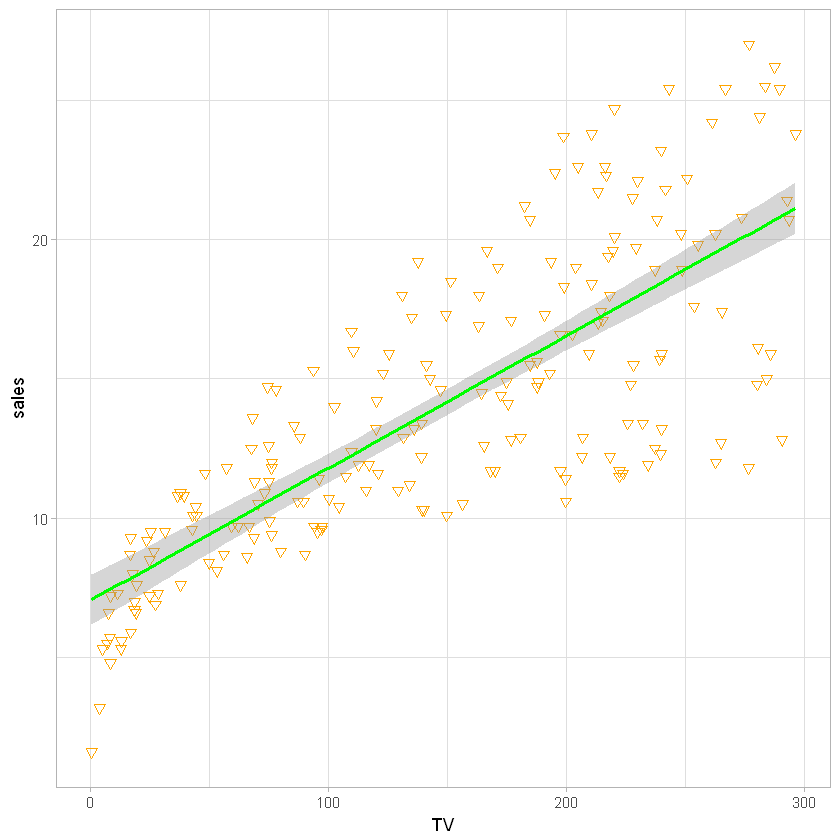

In [122]:
ggplot(data=advertising1, aes(x=TV, y=sales)) + geom_point(color='orange', size=2, shape=25) +geom_smooth(method=lm, color='green') +theme_light()

End of notebook